#Reading the data

In [402]:
!git clone https://github.com/alexeygrigorev/mlbookcamp-code

fatal: destination path 'mlbookcamp-code' already exists and is not an empty directory.


In [403]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
%matplotlib inline

In [404]:
df = pd.read_csv('/content/mlbookcamp-code/chapter-02-car-price/data.csv')

In [405]:
#Length of the data
len(df)

11914

In [406]:
#Seeing the first '3' rows of the data
df.head(3)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.00,6.00,MANUAL,rear wheel drive,2.00,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.00,6.00,MANUAL,rear wheel drive,2.00,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.00,6.00,MANUAL,rear wheel drive,2.00,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


In [407]:
#Seeing the last '3' rows of the data
df.tail(3)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11911,Acura,ZDX,2012,premium unleaded (required),300.00,6.00,AUTOMATIC,all wheel drive,4.00,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.00,6.00,AUTOMATIC,all wheel drive,4.00,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.00,6.00,AUTOMATIC,front wheel drive,4.00,Luxury,Midsize,Sedan,26,17,61,28995


In [408]:
#Observing th columns of our dataset
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [409]:
#Checking the number of columns without the need to count them one by one
len(df.columns)

16

As we see this dataset contains multiple columns:
**make**: brand of the car (BMW,Toyota..)


**model**:model of a car.


**year**:year when the car was manifactured.


**engine_fuel-type**:type of the fuel the engine needs (diesel,electric..)


**engine_hp**:horsepower of the engine.


**engine_cylindre**:number of cylindres
in the egine.


**transmission_type**:type of transmission (automatic or manual)


**driven_wheels**:front,rear,all.


**number_of_doors**:number of doors a car has.


**market_category**:luxury,crossover,..


**vehicule_size**:compact,midsize or large.


**vehicule_style**:sedan or convertible.


**highway_mpg**:miles per gallon (mpg) on the highway.


**city_mpg**:miles per gallon in the city.


**popularity**:number of times the car was mentioned in a Twitter stream.


**msrp**:manufacturer's suggested retail price.



In [410]:
#Getting a general info about the dataset such as types and null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [411]:
for col in df.columns:
  print(col , "has: ", df[col].nunique() , " values")
  print(df[col].value_counts().nlargest())
  print("\n","*"*20,"\n")

Make has:  48  values
Make
Chevrolet     1123
Ford           881
Volkswagen     809
Toyota         746
Dodge          626
Name: count, dtype: int64

 ******************** 

Model has:  915  values
Model
Silverado 1500        156
Tundra                140
F-150                 126
Sierra 1500            90
Beetle Convertible     89
Name: count, dtype: int64

 ******************** 

Year has:  28  values
Year
2015    2170
2016    2157
2017    1668
2014     589
2012     387
Name: count, dtype: int64

 ******************** 

Engine Fuel Type has:  10  values
Engine Fuel Type
regular unleaded                  7172
premium unleaded (required)       2009
premium unleaded (recommended)    1523
flex-fuel (unleaded/E85)           899
diesel                             154
Name: count, dtype: int64

 ******************** 

Engine HP has:  356  values
Engine HP
200.00    456
170.00    351
210.00    320
240.00    268
285.00    246
Name: count, dtype: int64

 ******************** 

Engine Cylinders 

#Some Cleaning

In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [413]:
#We're gonna change all columns to lowercase and replace the space between words with '_'
df.columns=df.columns.str.lower().str.replace(' ','_')

In [414]:
#making a list of the columns with data type 'object'
string_columns=list(df.dtypes[df.dtypes=='object'].index)
print(string_columns)
for col in string_columns:
  df[col]=df[col].str.lower().str.replace(' ','_')

['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']


In [415]:
#Chaning the 'make' column's name to 'brand'
df.rename(columns={'make':'brand'},inplace=True)
#Changing the 'msrp' column's name to 'price'
df.rename(columns={'msrp':'price'},inplace=True)

In [416]:
df.head()

,brand,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price
0,bmw,1_series_m,2011,premium_unleaded_(required),335.00,6.00,manual,rear_wheel_drive,2.00,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.00,6.00,manual,rear_wheel_drive,2.00,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.00,6.00,manual,rear_wheel_drive,2.00,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.00,6.00,manual,rear_wheel_drive,2.00,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.00,6.00,manual,rear_wheel_drive,2.00,luxury,compact,convertible,28,18,3916,34500


In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  price              11914 non-null  int64  
dtypes: float64(3), int64(5

#Exploratory Data Analysis

In [418]:
pd.options.display.float_format='{:.2f}'.format
df.describe()
#This following code will allow us to see some observations of our numeric dataset

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,price
count,11914.00,11845.00,11884.00,11908.00,11914.00,11914.00,11914.00,11914.00
mean,2010.38,249.39,5.63,3.44,26.64,19.73,1554.91,40594.74
std,7.58,109.19,1.78,0.88,8.86,8.99,1441.86,60109.10
min,1990.00,55.00,0.00,2.00,12.00,7.00,2.00,2000.00
25%,2007.00,170.00,4.00,2.00,22.00,16.00,549.00,21000.00
50%,2015.00,227.00,6.00,4.00,26.00,18.00,1385.00,29995.00
75%,2016.00,300.00,6.00,4.00,30.00,22.00,2009.00,42231.25
max,2017.00,1001.00,16.00,4.00,354.00,137.00,5657.00,2065902.00


In [419]:
df.describe(include=['O'])
#This way we can see object's observation in addition to the numeric ones seeing in the above code

,brand,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style
count,11914,11914,11911,11914,11914,8172,11914,11914
unique,48,914,10,5,4,71,3,16
top,chevrolet,silverado_1500,regular_unleaded,automatic,front_wheel_drive,crossover,compact,sedan
freq,1123,156,7172,8266,4787,1110,4764,3048


#Target variable analysis (price)

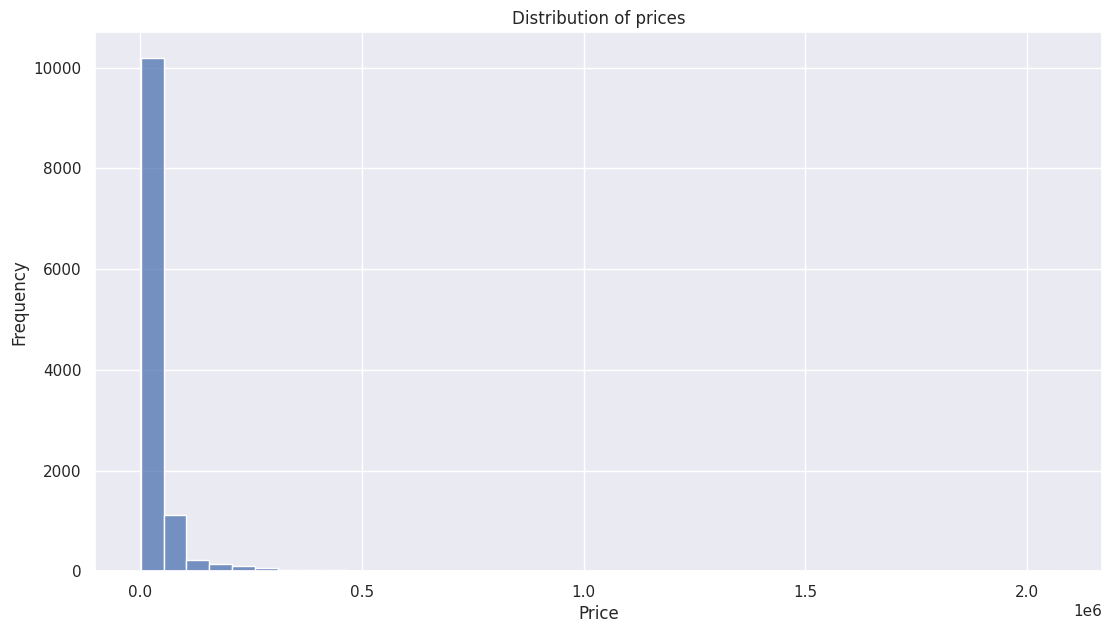

In [420]:
plt.figure(figsize=(13,7))
sns.histplot(df.price,bins=40) #bins specifies the number of interval we to divide our data into
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of prices')
plt.show()

This is a **long tail** distribution, which is a typical situation for many items with low prices and very few expensive ones.

We can have a clearer look by zooming in a bit and looking at values below $100,000

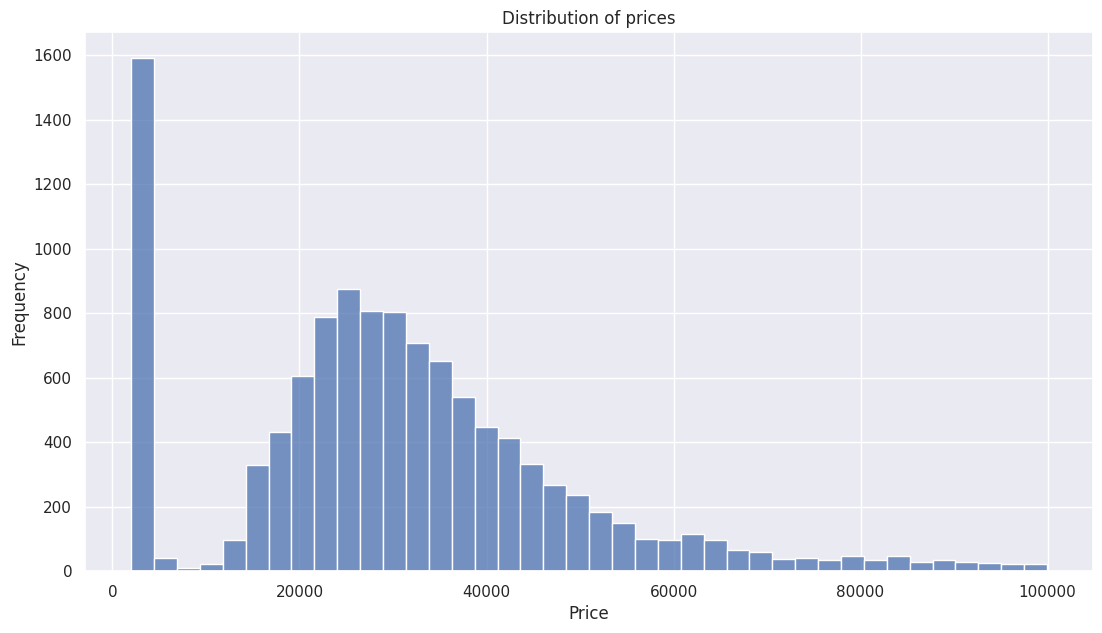

In [421]:
plt.figure(figsize=(13,7))
sns.histplot(df.price[df.price<100000],bins=40)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of prices')
plt.show()


The long tail makes it quite difficult for us to see the distribution, but it has an even stronger effect on a model: such distribution can greatly confuse the model, so it won't learn well enough.

One way to solve this problem is **log** transformation.

#Log Transformation

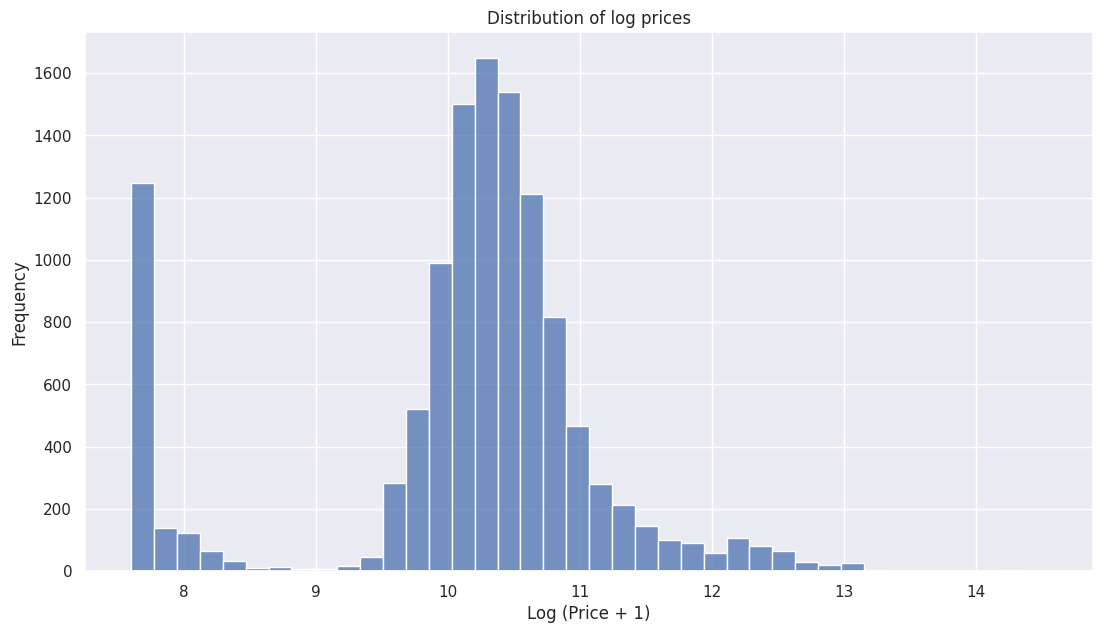

In [422]:
df['log_price']=np.log1p(df.price)
plt.figure(figsize=(13,7))
sns.histplot(df.log_price,bins=40)
plt.xlabel('Log (Price + 1)')
plt.ylabel('Frequency')
plt.title('Distribution of log prices')
plt.show()

The efect of the long tail is removed; and we can see the entire distribution in one plot.


The +1 part is important in cases that have zeros. The logarithm of zero is minus infinity, but the logarithm of one is zero.

For our specefic case, Zero values aren't an issue-all the prices we have start at $2,000 -but it's still a convention that we follow.

In [423]:
df.price.skew()

11.771987129334972

In [424]:
df.log_price.skew()

-0.9178678067039072

Positive Skewness vs Negative Skewness
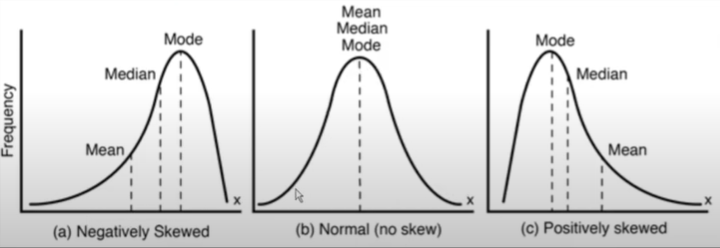

Check missing values

In [425]:
df.isnull().sum()

,0
brand,0
model,0
year,0
engine_fuel_type,3
engine_hp,69
engine_cylinders,30
transmission_type,0
driven_wheels,0
number_of_doors,6
market_category,3742


We should keep in mind that we need to handle missing values in order to correctly train our machine

In our case, luckily  our target which is the price has no missing values

#Check categorical columns

In [426]:
string_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

Some of the categorical columns might need to be trasformed to numerical form

#Some Observations

In [427]:
#Average price of BMW cars in the datset
df.price[df['brand']=='bmw'].mean()
#it's the same as df.groupby('brand').mean()['price']['bmw]

61546.76347305389

In [428]:
df.groupby('brand')

In [429]:
#Comparing the average price for cars before 2015
df.price[df['year']<2015].mean()

35457.18770062511

In [430]:
#Comparing the average price for cars after 2015
df.price[df['year']>=2015].mean()

45667.156463719766

#Validation framework
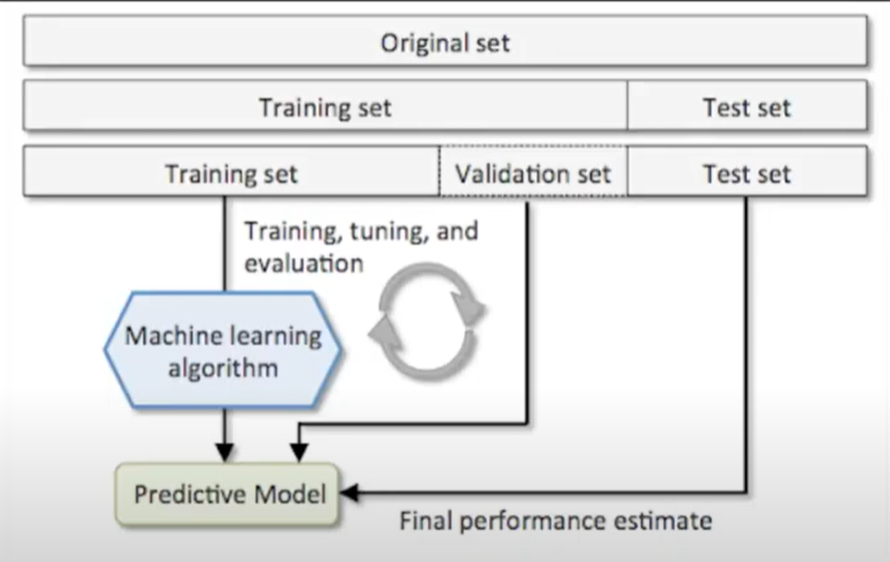

Image credit: [https://vitalflux.com/hold-out-method-for-training-machine-learning-model/](https://vitalflux.com/hold-out-method-for-training-machine-learning-model/)


In [431]:
np.random.seed(2) #Fixes the random seed to make sure that the results are reproducible
n=len(df)
n_test=int(0.2*n)
n_val=int(0.2*n)
n_train=n-(n_test+n_val)
print('No of rows for training : ',n_train)
print('No of rows for validation : ',n_val)
print('No of rows for testing : ',n_test)

No of rows for training :  7150
No of rows for validation :  2382
No of rows for testing :  2382


In [432]:
idx=np.arange(n)
print(idx)
np.random.shuffle(idx)
print(idx)

[    0     1     2 ... 11911 11912 11913]
[2735 6720 5878 ... 6637 2575 7336]


In [433]:
df_shuffled=df.iloc[idx]
print(df.index)
print(df_shuffled.index)

RangeIndex(start=0, stop=11914, step=1)
Index([ 2735,  6720,  5878, 11190,  4554,  8001,  2882,   649,   616,  4459,
       ...
        6751,   433,  4770, 11527,  1099,  2514, 11798,  6637,  2575,  7336],
      dtype='int64', length=11914)


In [434]:
df_shuffled

,brand,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price,log_price
2735,chevrolet,cobalt,2008,regular_unleaded,148.00,4.00,manual,front_wheel_drive,2.00,NaN,compact,coupe,33,24,1385,14410,9.58
6720,toyota,matrix,2012,regular_unleaded,132.00,4.00,automatic,front_wheel_drive,4.00,hatchback,compact,4dr_hatchback,32,25,2031,19685,9.89
5878,subaru,impreza,2016,regular_unleaded,148.00,4.00,automatic,all_wheel_drive,4.00,hatchback,compact,4dr_hatchback,37,28,640,19795,9.89
11190,volkswagen,vanagon,1991,regular_unleaded,90.00,4.00,manual,rear_wheel_drive,3.00,NaN,large,passenger_minivan,18,16,873,2000,7.60
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.00,8.00,automatic,four_wheel_drive,4.00,flex_fuel,large,crew_cab_pickup,21,15,5657,56260,10.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,chevrolet,chevy_van,1998,regular_unleaded,200.00,6.00,automatic,rear_wheel_drive,3.00,NaN,midsize,cargo_van,18,13,1385,2052,7.63
11798,subaru,xv_crosstrek,2014,regular_unleaded,160.00,4.00,automatic,all_wheel_drive,4.00,"crossover,hybrid",compact,4dr_suv,33,29,640,25995,10.17
6637,dodge,magnum,2006,regular_unleaded,250.00,6.00,automatic,all_wheel_drive,4.00,NaN,large,wagon,22,15,1851,29100,10.28
2575,honda,civic,2016,regular_unleaded,174.00,4.00,automatic,front_wheel_drive,4.00,NaN,midsize,sedan,42,31,2202,22200,10.01


In [435]:
df

,brand,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price,log_price
0,bmw,1_series_m,2011,premium_unleaded_(required),335.00,6.00,manual,rear_wheel_drive,2.00,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135,10.74
1,bmw,1_series,2011,premium_unleaded_(required),300.00,6.00,manual,rear_wheel_drive,2.00,"luxury,performance",compact,convertible,28,19,3916,40650,10.61
2,bmw,1_series,2011,premium_unleaded_(required),300.00,6.00,manual,rear_wheel_drive,2.00,"luxury,high-performance",compact,coupe,28,20,3916,36350,10.50
3,bmw,1_series,2011,premium_unleaded_(required),230.00,6.00,manual,rear_wheel_drive,2.00,"luxury,performance",compact,coupe,28,18,3916,29450,10.29
4,bmw,1_series,2011,premium_unleaded_(required),230.00,6.00,manual,rear_wheel_drive,2.00,luxury,compact,convertible,28,18,3916,34500,10.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.00,6.00,automatic,all_wheel_drive,4.00,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120,10.74
11910,acura,zdx,2012,premium_unleaded_(required),300.00,6.00,automatic,all_wheel_drive,4.00,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670,10.95
11911,acura,zdx,2012,premium_unleaded_(required),300.00,6.00,automatic,all_wheel_drive,4.00,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620,10.83
11912,acura,zdx,2013,premium_unleaded_(recommended),300.00,6.00,automatic,all_wheel_drive,4.00,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920,10.84


In [436]:
df_train=df_shuffled.iloc[:n_train].copy()
df_val=df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test=df_shuffled.iloc[n_val+n_train:].copy()

In [437]:
df_train.shape

(7150, 17)

In [438]:
df_val.shape

(2382, 17)

In [439]:
df_test.shape

(2382, 17)

In [440]:
y_train=df_train.log_price.values
y_val=df_val.log_price.values
y_test=df_test.log_price.values

#Baseline solution

In [441]:
base = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity'] #Numerical data only
#base = ['engine_hp','engine_cylinders']

In [442]:
df[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,335.00,6.00,26,19,3916
1,300.00,6.00,28,19,3916
2,300.00,6.00,28,20,3916
3,230.00,6.00,28,18,3916
4,230.00,6.00,28,18,3916
...,...,...,...,...,...
11909,300.00,6.00,23,16,204
11910,300.00,6.00,23,16,204
11911,300.00,6.00,23,16,204
11912,300.00,6.00,23,16,204


In [443]:
df[base].isnull().sum()

,0
engine_hp,69
engine_cylinders,30
highway_mpg,0
city_mpg,0
popularity,0


There are still missing values, We will fill them with the **mean** value

#Handling Missing Values

In [444]:
def prepare_X(df):
  df_num=df[base]
  df_num=df_num.fillna(df_num.mean())
  X=df_num.values
  return X

#Linear Regression
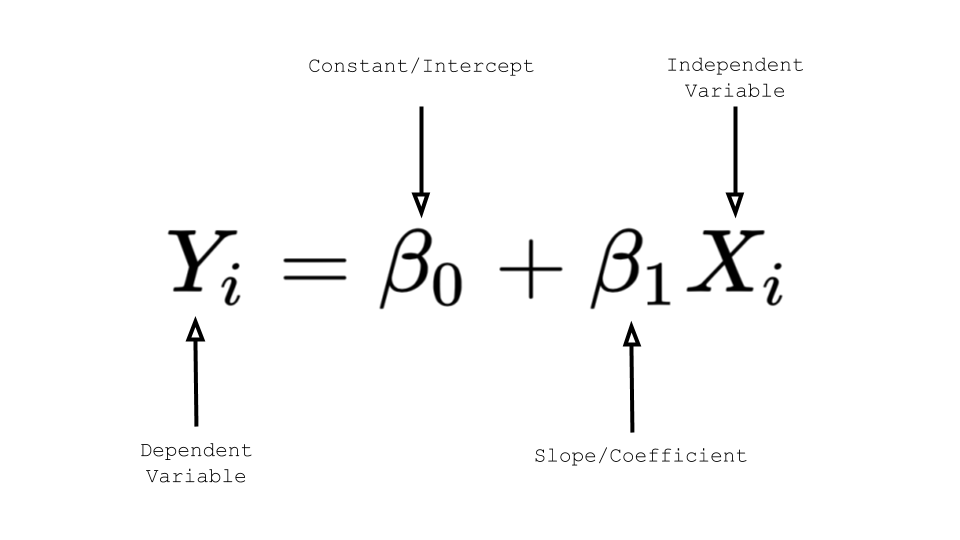

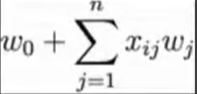

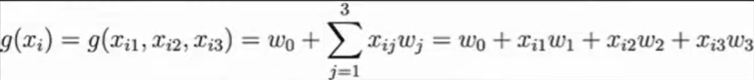

In [445]:
df_train.select_dtypes(include=np.number).corr()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,price,log_price
year,1.00,0.36,-0.04,0.26,0.25,0.20,0.08,0.22,0.77
engine_hp,0.36,1.00,0.78,-0.10,-0.39,-0.44,0.04,0.65,0.68
engine_cylinders,-0.04,0.78,1.00,-0.14,-0.60,-0.60,0.04,0.51,0.35
number_of_doors,0.26,-0.10,-0.14,1.00,0.11,0.12,-0.05,-0.12,0.11
highway_mpg,0.25,-0.39,-0.60,0.11,1.00,0.86,-0.02,-0.15,-0.01
city_mpg,0.20,-0.44,-0.60,0.12,0.86,1.00,0.00,-0.15,-0.03
popularity,0.08,0.04,0.04,-0.05,-0.02,0.00,1.00,-0.04,0.01
price,0.22,0.65,0.51,-0.12,-0.15,-0.15,-0.04,1.00,0.58
log_price,0.77,0.68,0.35,0.11,-0.01,-0.03,0.01,0.58,1.00


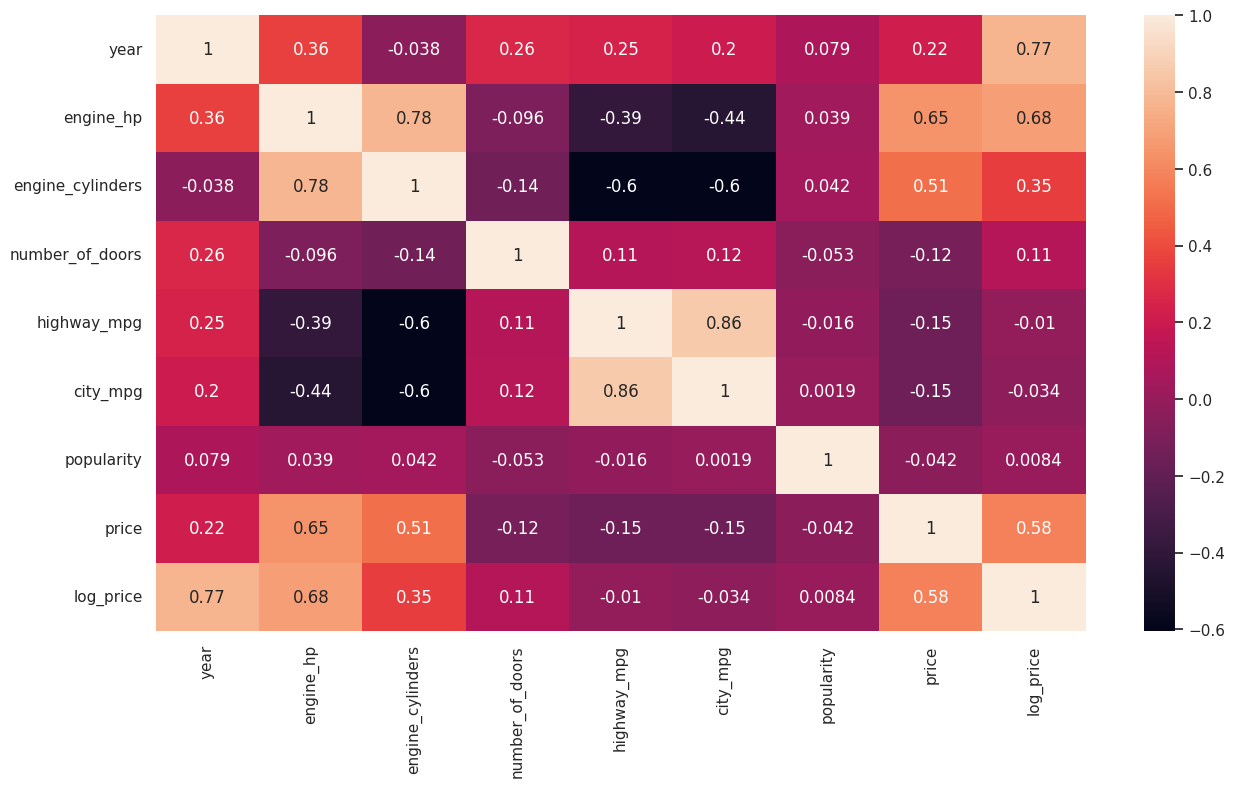

In [446]:
plt.figure(figsize=(15,8))
_=sns.heatmap(df_train.select_dtypes(include=np.number).corr(),annot=True)

In [447]:
def linear_regression(xi):
  n=len(xi)     #Number of features used
  pred=w0       #Initial / Base prediction
  for j in range(n):
    pred+=w[j]*xi[j]    #Formula = w0+ sigma[0:n-1]{w[j]*xi[j]}
  return pred

Using Normal Equation



 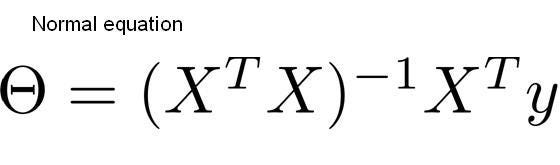

In [448]:
def train_linear_regression(X,y):
  ones = np.ones(X.shape[0])
  X = np.column_stack((ones,X))
  w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
  return w[0],w[1:]

In [449]:
X_train=prepare_X(df_train)
w_0,w=train_linear_regression(X_train,y_train) #y_train is the actual price
y_pred=w_0+X_train.dot(w) #y_pred is the predicted price

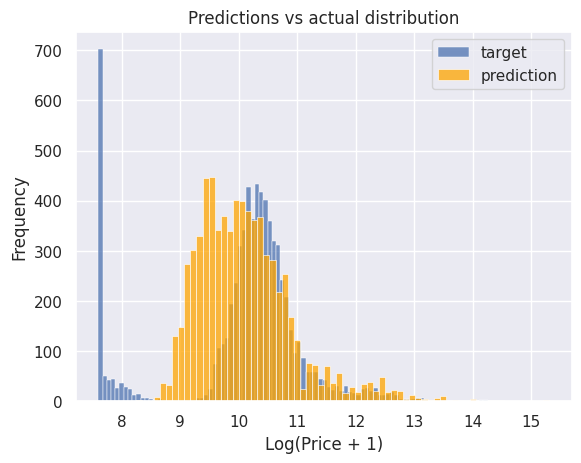

In [450]:
sns.histplot(y_train,label='target')
sns.histplot(y_pred,label='prediction',color='orange')
#Comparing the actual price vs the predicted one
plt.legend()
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.title('Predictions vs actual distribution')
plt.show()

#Model Evaluation

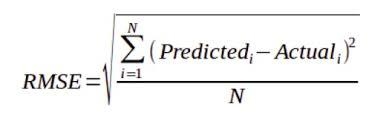

In [451]:
  def rmse(y,y_pred):
    error=y_pred-y
    mse=(error**2).mean()
    return np.sqrt(mse)

In [452]:
rmse(y_train,y_pred)

0.7574439819012008

In [453]:
#We gonna do the same thing for the validation
X_val=prepare_X(df_val)
y_pred=w_0+ X_val.dot(w)

In [454]:
rmse(y_val,y_pred)

0.7502502346381938

#Simple Feature Engineering

To improve our model, we can ceate other features and add them to the existing features. This process is called **feature engineering**

In [455]:
base

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [456]:
sorted(df.year.unique())

[1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017]

In [457]:
 def prepare_X(df):
  df=df.copy()
  features=base.copy()
  df['age']=2017-df.year #Because the dataset was created in 2017 (which we can verify by checking df_train.year.max())
  features.append('age')
  df_num=df[features]
  df_num=df_num.fillna(df_num.mean())
  X=df_num.values
  return X

In [458]:
X_train=prepare_X(df_train)
w_0,w=train_linear_regression(X_train,y_train)
y_pred=w_0+X_train.dot(w)
print('Train RMSE: ',rmse(y_train,y_pred))

X_val=prepare_X(df_val)
y_pred=w_0+X_val.dot(w)
print('Validation RMSE: ',rmse(y_val,y_pred))

Train RMSE:  0.5117454503079418
Validation RMSE:  0.5070033906013028


Adding **age** was quite helpful for the model

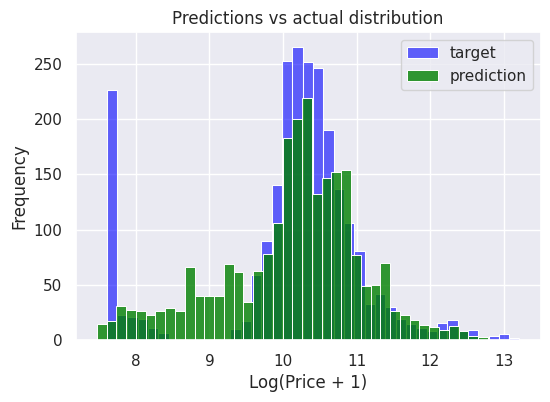

In [459]:
plt.figure(figsize=(6,4))
sns.histplot(y_val,label='target',color='blue',alpha=0.6,bins=40) #alpha controls the transparency of the bar
sns.histplot(y_pred,label='prediction',color='green',alpha=0.8,bins=40)
plt.legend()
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.title('Predictions vs actual distribution')
plt.show()

#Handling Categorical Variables

In [460]:
df.number_of_doors.value_counts()

,count
number_of_doors,
4.00,8353
2.00,3160
3.00,395


Handling No. of doors (One Hot Encoding)
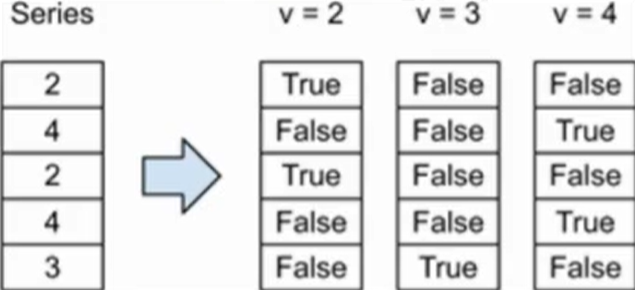

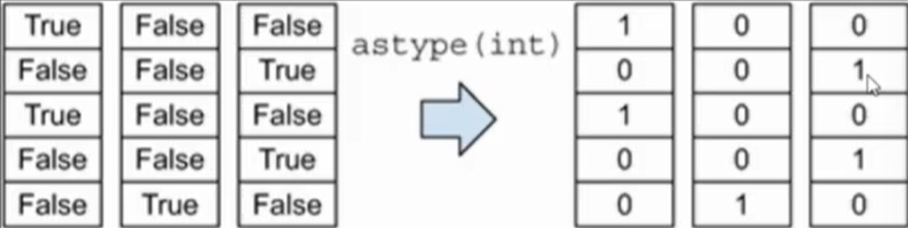

In [461]:
df['brand'].value_counts().head(10)

,count
brand,
chevrolet,1123
ford,881
volkswagen,809
toyota,746
dodge,626
nissan,558
gmc,515
honda,449
mazda,423


In [462]:
def prepare_X(df):
  df=df.copy()
  features=base.copy()
  df['age']=2017-df.year
  features.append('age')
  for v in [2,3,4]:
    feature='num_doors_%s'%v
    df[feature]=(df['number_of_doors']==v).astype(int)
    features.append(feature)
  for v in ['chevrolet','ford','volkswagen','toyota','dodge']:
    feature='is_brand_%s'%v
    df[feature]=(df['brand']==v).astype(int)
    features.append(feature)
  df_num=df[features]
  df_num=df_num.fillna(df_num.mean())
  X=df_num.values
  return X

In [463]:
X_train=prepare_X(df_train)
w_0, w=train_linear_regression(X_train,y_train)
y_pred=w_0+X_train.dot(w)
print('train: ',rmse(y_train,y_pred))
X_val=prepare_X(df_val)
y_pred=w_0+X_val.dot(w)
print('validation: ',rmse(y_val,y_pred))

train:  0.5010764007201611
validation:  0.4982643557277196


In [464]:
df['engine_fuel_type'].value_counts()

,count
engine_fuel_type,
regular_unleaded,7172
premium_unleaded_(required),2009
premium_unleaded_(recommended),1523
flex-fuel_(unleaded/e85),899
diesel,154
electric,66
flex-fuel_(premium_unleaded_required/e85),54
flex-fuel_(premium_unleaded_recommended/e85),26
flex-fuel_(unleaded/natural_gas),6


In [467]:
#We gonna repeat the same thing but this time we're gonna ad the 'engine_fuel_type' to the preperation function
def prepare_X(df):
  df=df.copy()
  features=base.copy()
  df['age']=2017-df.year
  features.append('age')
  for v in [2,3,4]:
    feature='num_doors_%s'%v
    df[feature]=(df['number_of_doors']==v).astype(int)
    features.append(feature)
  for v in ['chevrolet','ford','volkswagen','toyota','dodge']:
    feature='brand_%s'%v
    df[feature]=(df['brand']==v).astype(int)
    features.append(feature)
  for v in ['regular_unleaded', 'premium_unleaded_(required)','premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
    feature='is_type_%s' % v
    df[feature]=(df['engine_fuel_type']==v).astype(int)
  df_num=df[features]
  df_num=df_num.fillna(df_num.mean())
  X=df_num.values
  return X

In [468]:
X_train=prepare_X(df_train)
w_0,w=train_linear_regression(X_train,y_train)
y_pred=w_0+X_train.dot(w)
print('train: ',rmse(y_train,y_pred))
X_val=prepare_X(df_val)
y_pred=w_0+X_val.dot(w)
print('validation: ',rmse(y_val,y_pred))

train:  0.5010764007201611
validation:  0.4982643557277196


In [469]:
df['transmission_type'].value_counts()

,count
transmission_type,
automatic,8266
manual,2935
automated_manual,626
direct_drive,68
unknown,19


In [470]:
df['driven_wheels'].value_counts()

,count
driven_wheels,
front_wheel_drive,4787
rear_wheel_drive,3371
all_wheel_drive,2353
four_wheel_drive,1403


In [471]:
df['market_category'].value_counts().head(5)

,count
market_category,
crossover,1110
flex_fuel,872
luxury,855
"luxury,performance",673
hatchback,641


In [473]:
df['vehicle_style'].value_counts().head(5)

,count
vehicle_style,
sedan,3048
4dr_suv,2488
coupe,1211
convertible,793
4dr_hatchback,702


In [474]:
#We gonna repeat the same thing but this time we're gonna add new columns to the preperation function
def prepare_X(df):
  df=df.copy()
  features=base.copy()
  df['age']=2017-df.year
  features.append('age')
  for v in [2,3,4]:
    feature='num_doors_%s'%v
    df[feature]=(df['number_of_doors']==v).astype(int)
    features.append(feature)
  for v in ['chevrolet','ford','volkswagen','toyota','dodge']:
    feature='brand_%s'%v
    df[feature]=(df['brand']==v).astype(int)
    features.append(feature)
  for v in ['regular_unleaded','premium_unleaded_(required)','premium_unleaded_(recommended)','flex-fuel_(unleaded/e85)']:
    feature='is_type_%s'%v
    df[feature]=(df['engine_fuel_type']==v).astype(int)
    features.append(feature)
  for v in ['automatic','manual','automated_manual']:
    feature='is_transmission_%s'%v
    df[feature]=(df['transmission_type']==v).astype(int)
    features.append(feature)
  df_num=df[features]
  df_num=df_num.fillna(df_num.mean())
  X=df_num.values
  return X

In [475]:
X_train=prepare_X(df_train)
w_0,w=train_linear_regression(X_train,y_train)
y_pred=w_0+X_train.dot(w)
print('train: ',rmse(y_train,y_pred))
X_val=prepare_X(df_val)
y_pred=w_0+X_val.dot(w)
print('validation: ',rmse(y_val,y_pred))

train:  0.47227213583716005
validation:  0.4653694386689132


We gonna keep trying to add columns to the preperation seeking better train and validation scores

In [483]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'brand_%s' % v
        df[feature] = (df['brand'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)

    for v in ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']:
        feature = 'is_driven_wheels_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)

    for v in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']:
        feature = 'is_style_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)

    for v in ['compact', 'midsize', 'large']:
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)

    for v in ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']:
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X


In [484]:
X_train=prepare_X(df_train)
w_0,w=train_linear_regression(X_train,y_train)
y_pred=w_0+X_train.dot(w)
print('train: ',rmse(y_train,y_pred))
X_val=prepare_X(df_val)
y_pred=w_0+X_val.dot(w)
print('validation: ',rmse(y_val,y_pred))

train:  2219.4977297377545
validation:  795.8906366825912


In [486]:
w_0.astype(int)

77440924946976912

In [485]:
w.astype(int)

array([                 4,                133,                 83,
                       87,                  0,                 65,
                    76152,              76653,              76029,
                      -75,                -87,                296,
                     -181,                 64,               1753,
                     1499,               1645,               1882,
                     4513,               4348,               4323,
       -77440924947065216, -77440924947064944, -77440924947064576,
       -77440924947064240,                 55,                 79,
                      -71,               -204,               -280,
                     -455,               -243,               -329,
                        0,                  0,                  0,
                        0,                  0])

#Regularization



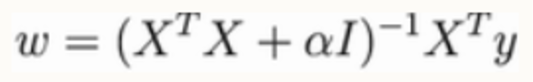

In [487]:
def train_linear_regression_reg(X,y,r=0.0):
  ones=np.ones(X.shape[0])
  X=np.column_stack([ones,X])
  XTX=X.T.dot(X)
  reg=r*np.eye(XTX.shape[0])
  XTX=XTX+reg
  XTX_inv=np.linalg.inv(XTX)
  w=XTX_inv.dot(X.T).dot(y)
  return w[0],w[1:]

In [488]:
X_train=prepare_X(df_train)

In [489]:
for r in [0 , 0.001 , 0.01 , 1 , 10]:
  w_0,w=train_linear_regression_reg(X_train,y_train,r=r)
  print('%5s, %.2f, %.2f, %.2f' %(r,w_0,w[13],w[21]))

    0, 77440924946976912.00, 64.03, -77440924947065216.00
0.001, 6.96, -0.10, 1.76
 0.01, 6.95, -0.10, 1.76
    1, 6.04, -0.10, 1.52
   10, 4.32, -0.09, 1.07


In [490]:
X_train=prepare_X(df_train)
w_0,w=train_linear_regression_reg(X_train,y_train,r=0)
y_pred=w_0+X_train.dot(w)
print('train: ',rmse(y_train,y_pred))
X_val=prepare_X(df_val)
y_pred=w_0+X_val.dot(w)
print('val: ',rmse(y_val,y_pred))

train:  2219.4977297377545
val:  795.8906366825912


In [491]:
X_train=prepare_X(df_train)
w_0,w=train_linear_regression_reg(X_train,y_train,r=0.01)
y_pred=w_0+X_train.dot(w)
print('train: ',rmse(y_train,y_pred))
X_val=prepare_X(df_val)
y_pred=w_0+X_val.dot(w)
print('val: ',rmse(y_val,y_pred))

train:  0.4623435462011015
val:  0.45751588650897834


In [492]:
X_train=prepare_X(df_train)
w_0,w=train_linear_regression_reg(X_train,y_train,r=0.1)
y_pred=w_0+X_train.dot(w)
print('train: ',rmse(y_train,y_pred))
X_val=prepare_X(df_val)
y_pred=w_0+X_val.dot(w)
print('val: ',rmse(y_val,y_pred))

train:  0.46237175764948885
val:  0.4576325827677228


In [493]:
X_train=prepare_X(df_train)
w_0,w=train_linear_regression_reg(X_train,y_train,r=1)
y_pred=w_0+X_train.dot(w)
print('train: ',rmse(y_train,y_pred))
X_val=prepare_X(df_val)
y_pred=w_0+X_val.dot(w)
print('val: ',rmse(y_val,y_pred))

train:  0.46365374351415706
val:  0.4589046994756599


In [494]:
X_train=prepare_X(df_train)
w_0,w=train_linear_regression_reg(X_train,y_train,r=10)
y_pred=w_0+X_train.dot(w)
print('train: ',rmse(y_train,y_pred))
X_val=prepare_X(df_val)
y_pred=w_0+X_val.dot(w)
print('val: ',rmse(y_val,y_pred))

train:  0.4760357335971355
val:  0.4707849371630168


In [495]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred=w_0+X_val.dot(w)
    print('%6s' %r,rmse(y_val,y_pred))

 1e-06 0.4575028907820457
0.0001 0.45750330803786093
 0.001 0.4575044546350645
  0.01 0.45751588650897834
   0.1 0.4576325827677228
     1 0.4589046994756599
     5 0.46450155470605864
    10 0.4707849371630168


In [496]:
X_train=prepare_X(df_train)
w_0,w=train_linear_regression_reg(X_train,y_train,r=0.01)

X_val=prepare_X(df_val)
y_pred=w_0+X_val.dot(w)
print('validation: ',rmse(y_val,y_pred))

X_test=prepare_X(df_test)
y_pred=w_0+X_test.dot(w)
print('test: ',rmse(y_test,y_pred))

validation:  0.45751588650897834
test:  0.4546002212754332


If we find the same results as we did before adding some columns its best to remove those columns from the preperation and not use them for training , but if the validation and train values are reduced then its best to se the regulation method

#Using the model

In [497]:
i = 2
ad = df_test.iloc[i].to_dict()
ad

{'brand': 'toyota',
 'model': 'venza',
 'year': 2013,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 268.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'all_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'crossover,performance',
 'vehicle_size': 'midsize',
 'vehicle_style': 'wagon',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031,
 'price': 31120,
 'log_price': 10.345638111452145}

In [498]:
X_test = prepare_X(pd.DataFrame([ad]))
y_pred = w_0 + X_test.dot(w)
suggestion = np.expm1(y_pred)
suggestion

array([28468.75677144])